# SG Wuhan Network Modelling

#### Author: leebond
#### Data: Ottokyu

#### Date: Feb 2020


## Contents:
1. Overall network graph
2. Most Influential Nodes
3. Most Convenient Nodes

In [1]:
import requests
import json
import re
import networkx as nx
import flask
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

from SGWuhanHelperFunctions import *

In [2]:
### Kudos to Ottokyu (https://twitter.com/ottokyu) creator of https://sgwuhan.xose.net/ for making the data available

sgwuhan_api = 'https://sgwuhan.xose.net/api/'
data = requests.get(sgwuhan_api)

In [3]:
data_dict = dict(data.json())

In [4]:
g = nx.Graph()
g = loadGraph(g, data_dict)

### Overall network
- hospitals are removed from the network since they will cause bias in the network analysis

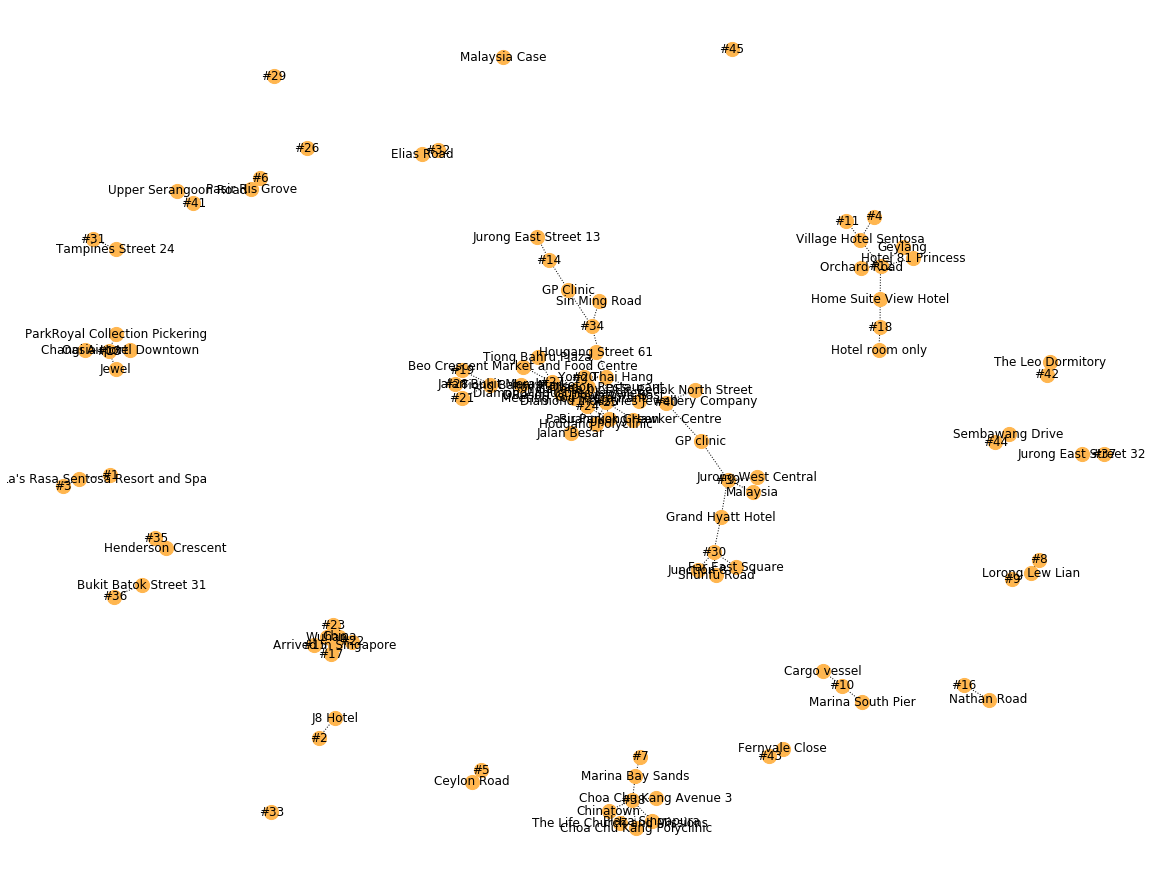

In [5]:
showGraph(g)

###  Most Influential Nodes
- Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality

- In other words, it measures how well a node is connected to all other well-connected nodes

- source: https://networkx.github.io/documentation/stable/

In [6]:
katz = getNodeCentrality(g, nx.katz_centrality)

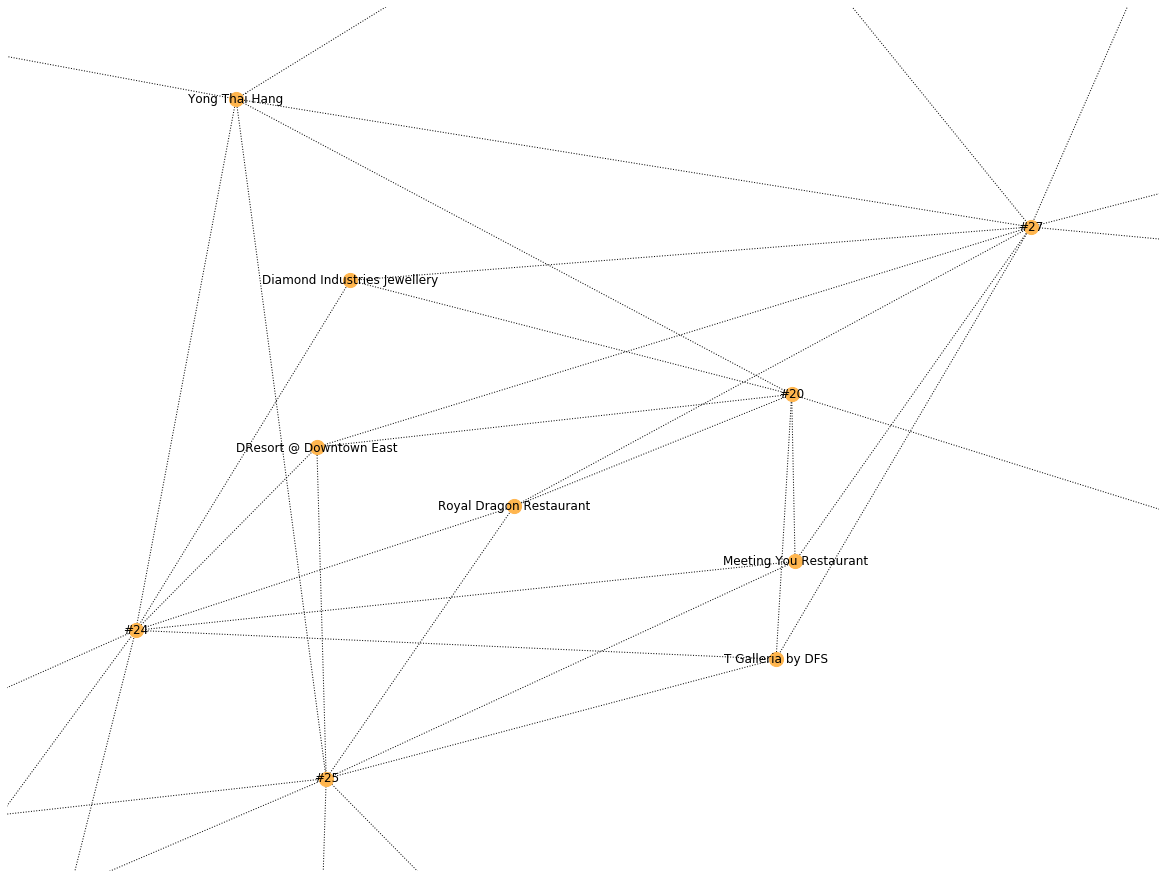

In [7]:
showSubGraph(g, katz, 10)

###  Most Convenient Nodes
- Betweenness centrality computes the centrality for a node based on how easy it is for a node to reach another node.
- In other words, it shows how quick each node can jump to another
- source: https://networkx.github.io/documentation/stable/

In [8]:
bet = getNodeCentrality(g, nx.betweenness_centrality)

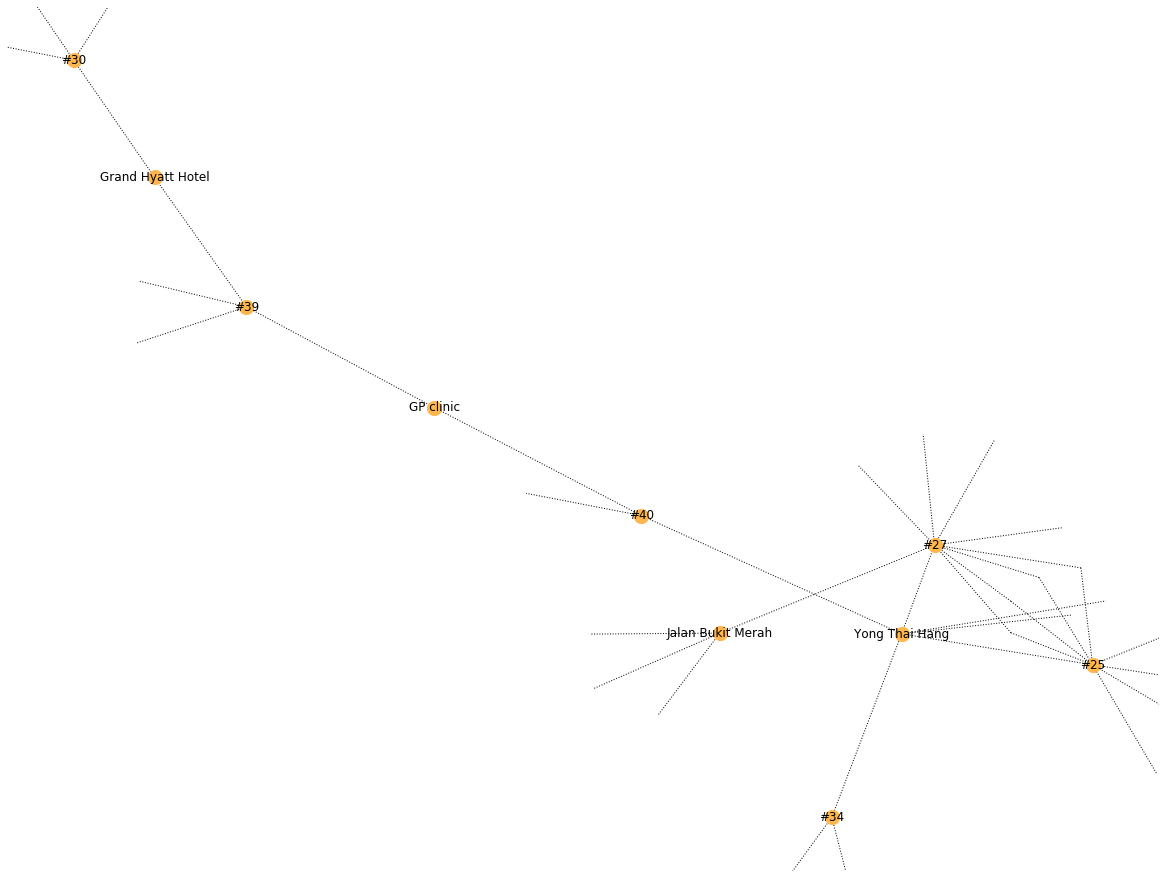

In [9]:
showSubGraph(g, bet, 10)

###  Most Centralized Nodes
- The closeness centrality computes the shortest distance to move from one node to another
- In other words, these are nodes that are frequently used for as 'bridges'
- source: https://networkx.github.io/documentation/stable/

In [10]:
clos = getNodeCentrality(g, nx.closeness_centrality)

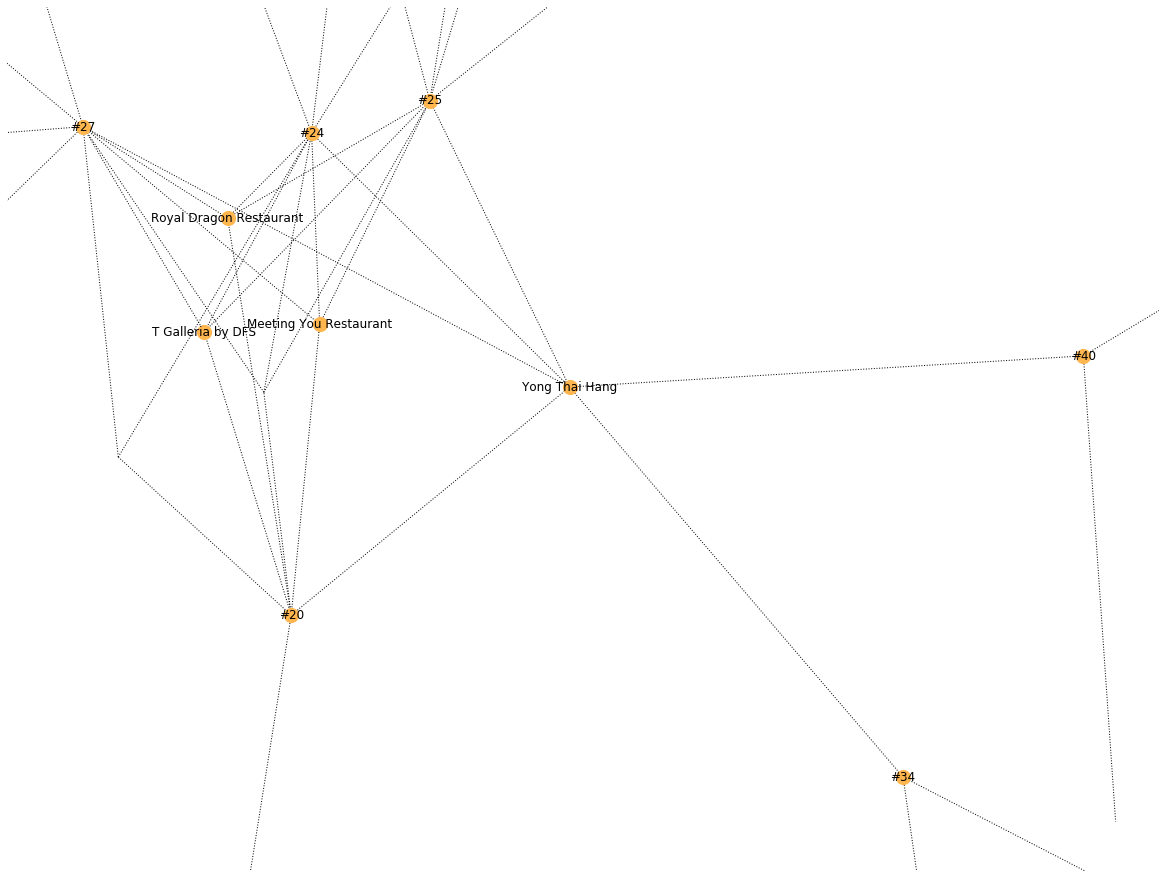

In [11]:
showSubGraph(g, clos, 10)

## Conclusion

- *Case #27* is the most connected individual thus far of the coronavirus outbreak in Singapore
- *Royal Dragon Restaurant, Meeting You Restaurant, Yong Thai Hang, T Galleria by DFS* are places that are most visited by the infected cases